In [20]:
#dependecies

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import os
from sklearn.ensemble import RandomForestClassifier



In [33]:
#Removing null values

def remove_null(data):
    train_data_drop = data.dropna()
    missing_value = train_data_drop.isnull().sum() 
    print(missing_value)
    return train_data_drop

In [56]:
train_data = pd.read_csv('./train.csv')
train_data = remove_null(train_data)

train_data.head()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [57]:
train_data_corr = train_data.drop(columns=['Name','Sex','Ticket','Cabin','Embarked'])
train_data_corr.head()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
1,2,1,1,38.0,1,0,71.2833
3,4,1,1,35.0,1,0,53.1000
6,7,0,1,54.0,0,0,51.8625
10,11,1,3,4.0,1,1,16.7000
11,12,1,1,58.0,0,0,26.5500


In [58]:
corr = train_data_corr.corr()
corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,0.148495,-0.089136,0.030933,-0.083488,-0.051454,0.029740
Survived,0.148495,1.000000,-0.034542,-0.254085,0.106346,0.023582,0.134241
Pclass,-0.089136,-0.034542,1.000000,-0.306514,-0.103592,0.047496,-0.315235
Age,0.030933,-0.254085,-0.306514,1.000000,-0.156162,-0.271271,-0.092424
SibSp,-0.083488,0.106346,-0.103592,-0.156162,1.000000,0.255346,0.286433
Parch,-0.051454,0.023582,0.047496,-0.271271,0.255346,1.000000,0.389740
Fare,0.029740,0.134241,-0.315235,-0.092424,0.286433,0.389740,1.000000


<Axes: >

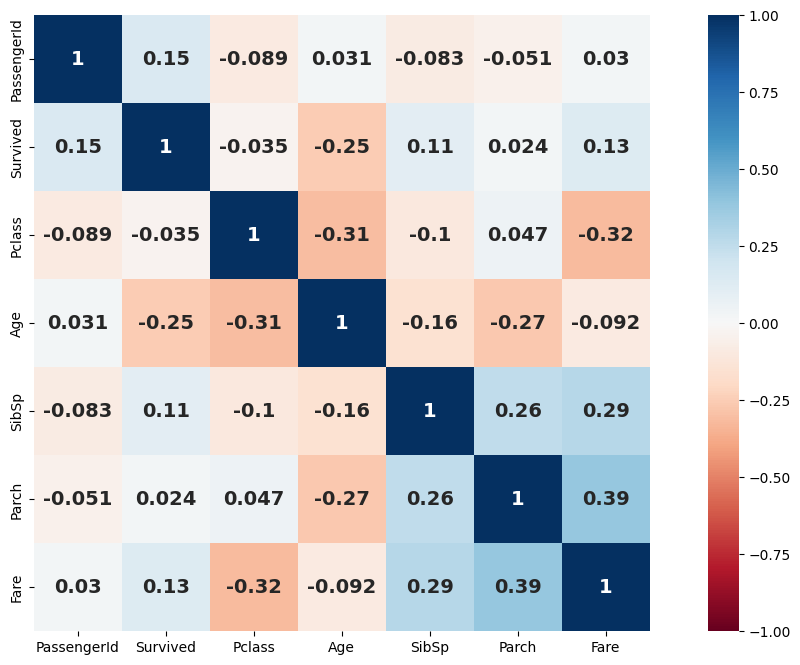

In [59]:
plt.figure(figsize=(15, 8)) # Make the heatmap larger 
sns.heatmap(corr, cmap='RdBu', vmin=-1, vmax=1, annot=True, 
            annot_kws={'fontsize':14, 'fontweight':'bold'},
           square=True)

In [60]:
##There can be realtion with the gender so making it model ready
Sex_female_train = []
Sex_male_train = []
for s in train_data.Sex:
    if s == "female":
        Sex_female_train.append(1)
        Sex_male_train.append(0)
    else:
        Sex_female_train.append(0)
        Sex_male_train.append(1)

# Create a dataframe for sex
Sex_train = pd.DataFrame({"Sex_male":Sex_male_train,
                        "Sex_female":Sex_female_train})
Sex_train.head()

,Sex_male,Sex_female
0,0,1
1,0,1
2,1,0
3,0,1
4,0,1


In [61]:
frames_train = [train_data_corr, Sex_train]
train_data_frames = pd.concat(frames_train, axis=1)
train_data_frames.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Sex_female
1,2.0,1.0,1.0,38.0,1.0,0.0,71.2833,0.0,1.0
3,4.0,1.0,1.0,35.0,1.0,0.0,53.1000,0.0,1.0
6,7.0,0.0,1.0,54.0,0.0,0.0,51.8625,1.0,0.0
10,11.0,1.0,3.0,4.0,1.0,1.0,16.7000,1.0,0.0
11,12.0,1.0,1.0,58.0,0.0,0.0,26.5500,0.0,1.0


In [62]:
##Finding important features

X = train_data_frames.drop(columns=['Survived'])
Y = train_data_frames.drop(columns=['PassengerId','Pclass','Age','SibSp','Parch','Fare','Sex_male','Sex_female'])
# Check for null values in X
null_values_X = X.isnull().sum()

# Check for null values in Y
null_values_Y = Y.isnull().sum()

print(null_values_X)
print(null_values_Y)


PassengerId    153
Pclass         153
Age            153
SibSp          153
Parch          153
Fare           153
Sex_male       153
Sex_female     153
dtype: int64
Survived    153
dtype: int64
